# Projet numérique : choix du pas de temps

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## Première approche : pas fixe

### Schéma d'ordre 1

On va utiliser le schéma d'Euler explicite :

Si la fonction x vérifie : $\dot{y} = f(t, y)$ et $y(t_0) = x_0$

Alors on peut évaluer la fonction point par point : $x_{n+1} = x_n + f(t_n, x_n)*dt$

In [7]:
def solve_euler_explicit(f, x0, dt, tf, t0 = 0):
    x = x0
    n = int((tf-t0)/dt)  # nombre d'itérations
    t = np.linspace(t0, tf, n)
    for i in t[:-1]:
        prochain_point = x[-1] + f(i, x[-1])*dt
        x.append(prochain_point)
    return t, x

### Illustration du schéma d'ordre 1

- On considère l'équation $\dot{y} = y$ vérifiée par la fonction $exp$, avec $y_0 = 1$

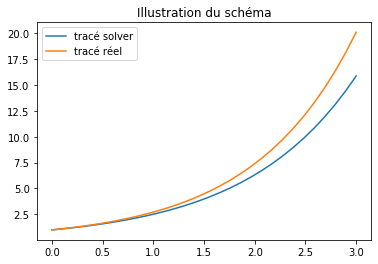

In [8]:
def f(t, x):
    return x

x_axis = solve_euler_explicit(f, [1], 0.1, 3, 0)[0]
y_solver = solve_euler_explicit(f, [1], 0.1, 3, 0)[1]
y_reel = [np.exp(i) for i in x_axis]

plt.plot(x_axis, y_solver, label = "tracé solver")
plt.plot(x_axis, y_reel, label = "tracé réel")
plt.title('Illustration du schéma')
plt.legend()
plt.show()

### Mise en évidence de la convergence d'ordre 1

Nous cherchons $c_v$ tel que : 
$$ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v * dt $$

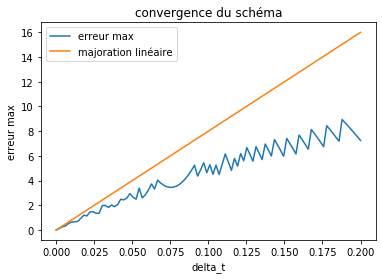

In [55]:
def max(f, g, x0, dt, tf, t0 = 0):
    S = solve_euler_explicit(f, x0, dt, tf, t0)
    m = 0
    for n, i in enumerate(S[0]):
        if abs(g(i) - S[1][n]) > m:
            m = abs(g(i) - S[1][n])
    return m

delta_t = np.linspace(10**-5, 0.2, 100)
erreur_max = [max(f, np.exp, [1], i, 3, 0) for i in delta_t]
plt.plot(delta_t, erreur_max, label = 'erreur max')
plt.xlabel('delta_t')
plt.ylabel('erreur max')
plt.title('convergence du schéma')
y = [80*i for i in delta_t]
plt.plot(delta_t, y, label = 'majoration linéaire')
plt.legend()
plt.show()

On observe bien une majoration linéaire en fonction de delta_t, avec $c_v = 80$. La convergence est donc (au moins) d'ordre 1.

### Schéma d'ordre 2

On va utiliser PICHE